In [136]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_2(f, a, b, h, w0):
    n = int((b - a) / h)
    w = [w0]
    t = a
    for _  in range(n):
        k1 = f(t, w[-1])
        k2 = f(t + h / 2, w[-1] + h * k1 / 2)
        w_next = w[-1] + h * k2
        w.append(w_next)
        t += h
    return np.array(w)

def runge_kutta_4(f, a, b, h, w0):
    n = int((b - a) / h)
    w = [w0]
    t = a
    for _ in range(n):
        k1 = f(f, w[-1])
        k2 = f(t + h / 2, w[-1] + h * k1 / 2)
        k3 = f(t + h / 2, w[-1] + h * k2 / 2)
        k4 = f(t + h, w[-1] + h * k3)
        w_next = w[-1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        w.append(w_next)
        t += h
    return np.array(w)

In [137]:
f = lambda t, y: 2 / t * y + t ** 2 * np.exp(t)
a = 1
b = 2
h = 0.1
w0 = 0

w_rk2 = runge_kutta_2(f, a, b, h, w0)[1:]
w_rk4 = runge_kutta_4(f, a, b, h, w0)[1:]

print("Runge-Kutta de orden 2:\n", w_rk2)
print("Runge-Kutta de orden 4:\n", w_rk4)

Runge-Kutta de orden 2:
 [ 0.34094443  0.85490961  1.58670777  2.58880769  3.92252505  5.65938696
  7.88269471 10.68931241 14.19171264 18.52031456]
Runge-Kutta de orden 4:
 [ 0.34591029  0.86662169  1.60718135  2.62031131  3.9676019   5.72087932
  7.96377179 10.79350178 14.32293573 18.68292657]


In [138]:
def exact_solution(t):
    return t ** 2 * (np.exp(t) - np.exp(1))

los valores exactos son: 
[ 0.34591988  0.86664254  1.60721508  2.62035955  3.96766629  5.72096153
  7.96387348 10.79362466 14.32308154 18.68309708]
los errores son:
 orden2: 
[0.00497544 0.01173293 0.0205073  0.03155186 0.04514124 0.06157457
 0.08117877 0.10431225 0.1313689  0.16278252]
 orden4:
[9.58923330e-06 2.08430307e-05 3.37305167e-05 4.82453640e-05
 6.43962398e-05 8.22013519e-05 1.01685240e-04 1.22876842e-04
 1.45808302e-04 1.70514234e-04]


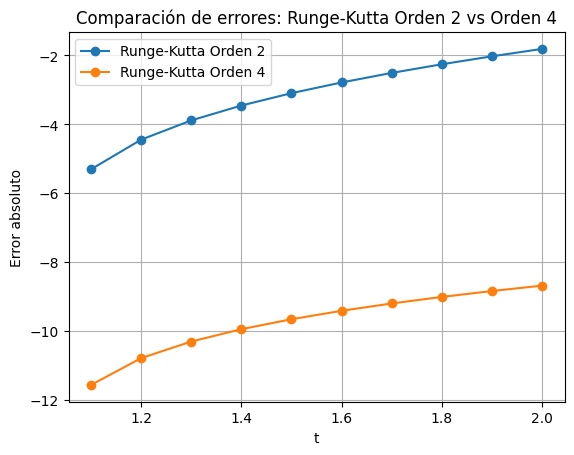

In [139]:
t_values = np.arange(a, b + h, h)
exact_values = exact_solution(t_values)[1:]

print(f"los valores exactos son: \n{exact_values}")

error_rk2 = np.abs(w_rk2 - exact_values)
error_rk4 = np.abs(w_rk4 - exact_values)

print(f"los errores son:\n orden2: \n{error_rk2}\n orden4:\n{error_rk4}")

plt.plot(t_values[1:], np.log(error_rk2), label="Runge-Kutta Orden 2", marker='o')
plt.plot(t_values[1:], np.log(error_rk4), label="Runge-Kutta Orden 4", marker='o')
plt.xlabel("t")
plt.ylabel("Error absoluto")
plt.legend()
plt.title("Comparación de errores: Runge-Kutta Orden 2 vs Orden 4")
plt.grid()
plt.show()
